# Empirical Analysis
First we load the dataset and import the libraries we need.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

def moving_average(df, column_name, window_size):
    """
    Calculate the moving average of a specified column in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to calculate the moving average for.
    window_size (int): The window size for the moving average.
    
    Returns:
    pd.DataFrame: The DataFrame with the new moving average column.
    """
    # Ensure the column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")
    
    # Calculate the moving average and create a new column
    df[f'{column_name}_MA'] = df[column_name].rolling(window=window_size, min_periods=1).mean()
    
    return df

# Load the Excel file
file_path = r'Throughput Tests - Speedtest - Active Measurements.csv'
active_throughput = pd.read_csv(file_path)

file_path = r'Latency Tests - Online Gaming - Active Measurements.csv'
active_latency = pd.read_csv(file_path)

file_path = r'4G - Passive measurements.csv'
passive_measurement = pd.read_csv(file_path)


C:\Users\Asus irG\AppData\Local\Temp\ipykernel_22780\2330174387.py:30: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  active_throughput = pd.read_csv(file_path)
C:\Users\Asus irG\AppData\Local\Temp\ipykernel_22780\2330174387.py:33: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  active_latency = pd.read_csv(file_path)


A statistical analysis of the throughput performance for all the Operators present in the 
dataset, by dividing the data per mobility scenario and per used radio technology (i.e., if the 
device was connected to 4G or to 5G Non-Standalone during the measurement campaigns). 

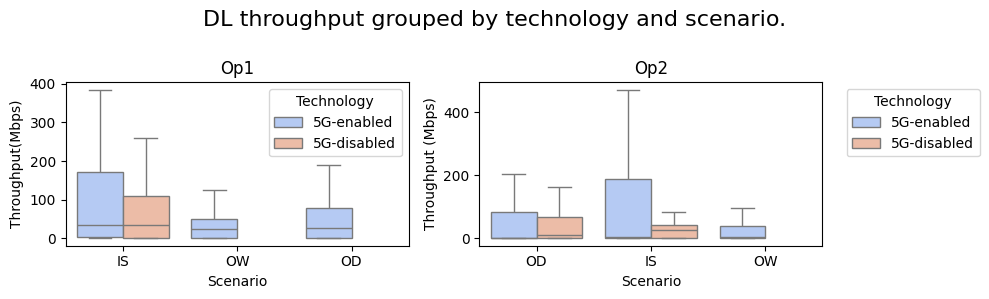

In [17]:
filtered_throughput = active_throughput[['5G PDSCH Throughput', 'Scenario', 'Campaign', 'UE Mode', 'LTE PDSCH Throughput']]

# Replace '?' and '0' with NaN
active_throughput[['5G PDSCH Throughput', 'LTE PDSCH Throughput']] = active_throughput[['5G PDSCH Throughput', 'LTE PDSCH Throughput']].replace(['?', '0'], np.nan)

# Remove rows where both '5G PDSCH Throughput' and 'LTE PDSCH Throughput' are NaN
cleaned_throughput = active_throughput.dropna(subset=['5G PDSCH Throughput', 'LTE PDSCH Throughput'], how='all')

Final_throughput = pd.DataFrame()
Final_throughput[[ 'Scenario', 'Campaign', 'UE Mode', 'Operator']] = cleaned_throughput[[ 'Scenario', 'Campaign', 'UE Mode', 'Operator']]
Final_throughput['Throughput'] = (cleaned_throughput['LTE PDSCH Throughput'].combine_first(cleaned_throughput['5G PDSCH Throughput'])).astype(float)

# Calculate the moving average with a window size of 3
Final_throughput = moving_average(Final_throughput, 'Throughput', 3)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Operator 1

data = {
    'Scenario':  Final_throughput[Final_throughput['Operator'] == 'Op1']['Scenario'],
    'Throughput(Mbps)':  1e-3 * Final_throughput[Final_throughput['Operator'] == 'Op1']['Throughput_MA'].astype(float),
    'Technology':  Final_throughput[Final_throughput['Operator'] == 'Op1']['UE Mode']
}

df = pd.DataFrame(data)

sns.boxplot(x='Scenario', y='Throughput(Mbps)', hue='Technology', data=df,ax=axes[0] , palette="coolwarm", showfliers=False)
axes[0].set_title('Op1')

# Operator 2

data = {
    'Scenario':  Final_throughput[Final_throughput['Operator'] == 'Op2']['Scenario'],
    'Throughput(Mbps)':  1e-3 * Final_throughput[Final_throughput['Operator'] == 'Op2']['Throughput_MA'].astype(float),
    'Technology':  Final_throughput[Final_throughput['Operator'] == 'Op2']['UE Mode']
}

df = pd.DataFrame(data)

sns.boxplot(x='Scenario', y='Throughput(Mbps)', hue='Technology', data=df,ax=axes[1] , palette="coolwarm", showfliers=False)
axes[1].set_title('Op2')


# Add title and labels
plt.xlabel('Scenario')
plt.ylabel('Throughput (Mbps)')

# Move the legend outside the plot
plt.legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')



# Add a title to the whole figure
fig.suptitle('DL throughput grouped by technology and scenario.', fontsize=16)
# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust rect to fit the suptitle

# Show the plot
plt.show()



A statistical view of the latency performance (i.e., round trip time, RTT) for all the 
Operators in the dataset, by dividing the data per mobility scenario and per used radio 
technology. 

C:\Users\Asus irG\AppData\Local\Temp\ipykernel_22864\73247186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_latency['Round Trip Latency Median'] = filtered_latency['Round Trip Latency Median'].replace(['?', '0'], np.nan)


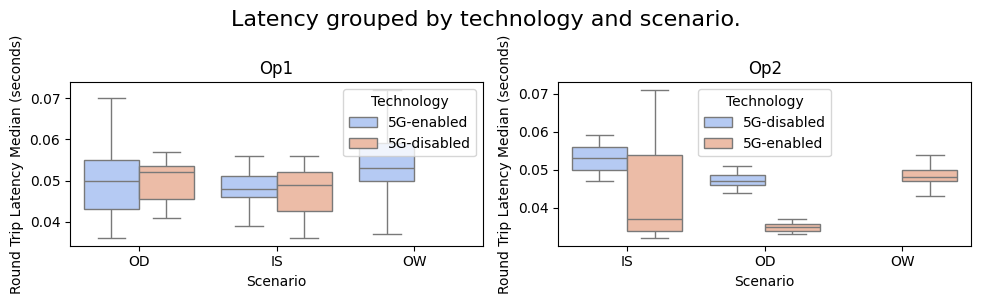

In [19]:

filtered_latency = active_latency[['Round Trip Latency Median', 'Scenario', 'Campaign', 'UE Mode', 'Operator']]

# Replace '?' and '0' with NaN
filtered_latency['Round Trip Latency Median'] = filtered_latency['Round Trip Latency Median'].replace(['?', '0'], np.nan)

# # Remove rows where 'Round Trip Latency Median' are NaN
final_latency = filtered_latency.dropna(subset=['Round Trip Latency Median'], how='all')

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Operator 1
data = {
    'Scenario':  final_latency[final_latency['Operator'] == 'Op1']['Scenario'],
    'Round Trip Latency Median (seconds)':  final_latency[final_latency['Operator'] == 'Op1']['Round Trip Latency Median'].astype(float),
    'Technology':  final_latency[final_latency['Operator'] == 'Op1']['UE Mode']
}
df = pd.DataFrame(data)                 
sns.boxplot(x='Scenario', y='Round Trip Latency Median (seconds)', hue='Technology', data=df, ax = axes[0] , palette="coolwarm", showfliers=False)
axes[0].set_title('Op1')

# Operator 2
data = {
    'Scenario':  final_latency[final_latency['Operator'] == 'Op2']['Scenario'],
    'Round Trip Latency Median (seconds)':  final_latency[final_latency['Operator'] == 'Op2']['Round Trip Latency Median'].astype(float),
    'Technology':  final_latency[final_latency['Operator'] == 'Op2']['UE Mode']
}
df = pd.DataFrame(data)                 
sns.boxplot(x='Scenario', y='Round Trip Latency Median (seconds)', hue='Technology', data=df, ax = axes[1] , palette="coolwarm", showfliers=False)
axes[1].set_title('Op2')


# Add a title to the whole figure
fig.suptitle('Latency grouped by technology and scenario.', fontsize=16)
# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust rect to fit the suptitle

# Show the plot
plt.show()

We ompare the RSRP values in a time series format for the obtained list of 4G PCIs.

C:\Users\Asus irG\AppData\Local\Temp\ipykernel_22864\3155281186.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  One_Active_Campaign.fillna(method='bfill', inplace=True)
C:\Users\Asus irG\AppData\Local\Temp\ipykernel_22864\3155281186.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  One_Active_Campaign.fillna(method='ffill', inplace=True)
C:\Users\Asus irG\AppData\Local\Temp\ipykernel_22864\3155281186.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  One_Passive_Campaign.fillna(method='bfill', inplace=True)
C:\Users\Asus irG\AppData\Local\Temp\ipykernel_22864\3155281186.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() ins

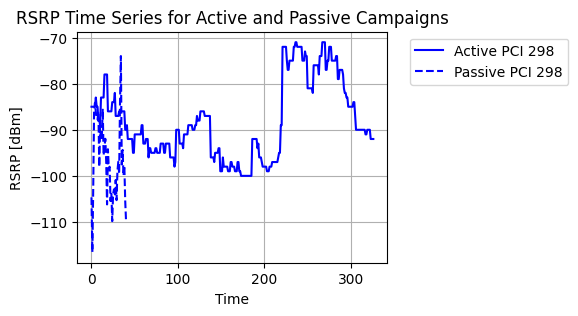

In [24]:
# Filter the active throughput DataFrame
One_Active_Campaign = active_throughput[
    (active_throughput['Campaign'] == 'Speedtest_Campaign_41') & 
    (active_throughput['Scenario'] == 'OD') & 
    (active_throughput['UE Mode'] == '5G-disabled')
][['Campaign', 'Operator', 'RSRP', 'LTE PCI', 'Time']]

# Replace '?' with NaN
One_Active_Campaign.replace('?', np.nan, inplace=True)

# Forward and backward fill NaN values
One_Active_Campaign.fillna(method='bfill', inplace=True)
One_Active_Campaign.fillna(method='ffill', inplace=True)

# Convert 'LTE PCI' to integers and get unique PCI values
One_Active_Campaign['LTE PCI'] = One_Active_Campaign['LTE PCI'].astype(int)
One_Active_Campaign_PCI_List = One_Active_Campaign['LTE PCI'].unique()

# Filter the passive measurement DataFrame
One_Passive_Campaign = passive_measurement[
    (passive_measurement['campaign'] == 'campaign_41_OD_4G_speedtest') & 
    (passive_measurement['scenario'] == 'OD')
][['campaign', 'RSRP', 'PCI', 'Time']]

# Replace '?' with NaN
One_Passive_Campaign.replace('?', np.nan, inplace=True)

# Forward and backward fill NaN values
One_Passive_Campaign.fillna(method='bfill', inplace=True)
One_Passive_Campaign.fillna(method='ffill', inplace=True)

# Convert 'PCI' to integers and get unique PCI values
One_Passive_Campaign['PCI'] = One_Passive_Campaign['PCI'].astype(int)
One_Passive_Campaign_PCI_List = One_Passive_Campaign['PCI'].unique()

# Find the intersection of PCI lists between active and passive campaigns
common_pci_list = np.intersect1d(One_Passive_Campaign_PCI_List, One_Active_Campaign_PCI_List)

# Filter both DataFrames to only include common PCIs
One_Active_Campaign = One_Active_Campaign[One_Active_Campaign['LTE PCI'].isin(common_pci_list)]
One_Passive_Campaign = One_Passive_Campaign[One_Passive_Campaign['PCI'].isin(common_pci_list)]


PCIs = np.intersect1d(One_Passive_Campaign_PCI_List, One_Active_Campaign_PCI_List)
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot the data
plt.figure(figsize=(4, 3))

for PCI, i in zip(PCIs[1:2], range(len(PCIs))):
    active_filtered = One_Active_Campaign[One_Active_Campaign['LTE PCI'] == PCI]
    passive_filtered = One_Passive_Campaign[One_Passive_Campaign['PCI'] == PCI]
    
    plt.plot(range(active_filtered.shape[0]), active_filtered['RSRP'].astype(float), color = colors[i], label=f'Active PCI {PCI}')
    plt.plot(range(passive_filtered.shape[0]), passive_filtered['RSRP'].astype(float), color = colors[i], label=f'Passive PCI {PCI}', linestyle='--')

# Customizing the plot
plt.xlabel('Time')
plt.ylabel('RSRP [dBm]')
plt.title('RSRP Time Series for Active and Passive Campaigns')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

The Speedtest DL throughput achieved during 5G-enabled sessions executed in an IS sub-campaig.

C:\Users\Asus irG\AppData\Local\Temp\ipykernel_13416\155545168.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Throughput.fillna(method='bfill', inplace=True)
C:\Users\Asus irG\AppData\Local\Temp\ipykernel_13416\155545168.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Throughput.fillna(method='ffill', inplace=True)


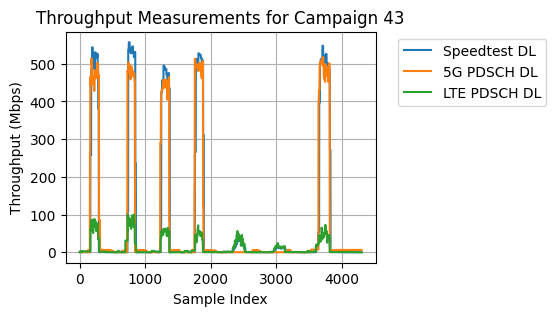

In [84]:
# Filter the DataFrame for 5G-enabled UE mode
Throughput = active_throughput[
    (active_throughput['UE Mode'] == '5G-enabled')
][['Current Netw. DL', '5G PDSCH Throughput', 'LTE PDSCH Throughput', 'Campaign']]

# Replace '?' with NaN
Throughput.replace('?', np.nan, inplace=True)

# Forward and backward fill NaN values
Throughput.fillna(method='bfill', inplace=True)
Throughput.fillna(method='ffill', inplace=True)

# Filter for specific campaign
Throughput = Throughput[Throughput['Campaign'] == 'Speedtest_Campaign_43'][['Current Netw. DL', '5G PDSCH Throughput', 'LTE PDSCH Throughput']]

# Convert to float
Throughput = Throughput.astype(float)

# Plot the data
plt.figure(figsize=(4, 3))

plt.plot(range(Throughput.shape[0]), 1e-3 * Throughput['Current Netw. DL'], label='Speedtest DL')
plt.plot(range(Throughput.shape[0]), 1e-3 * Throughput['5G PDSCH Throughput'], label='5G PDSCH DL')
plt.plot(range(Throughput.shape[0]), 1e-3 * Throughput['LTE PDSCH Throughput'], label='LTE PDSCH DL')

# Adding titles and labels
plt.title('Throughput Measurements for Campaign 43')
plt.xlabel('Sample Index')
plt.ylabel('Throughput (Mbps)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

5G SS-RSRP [dBm] (in an ecdf format) grouped by scenario.

C:\Users\Asus irG\AppData\Local\Temp\ipykernel_13416\1549323910.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.replace('?', np.nan, inplace=True)
C:\Users\Asus irG\AppData\Local\Temp\ipykernel_13416\1549323910.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.ffill(inplace=True)
C:\Users\Asus irG\AppData\Local\Temp\ipykernel_13416\1549323910.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filte

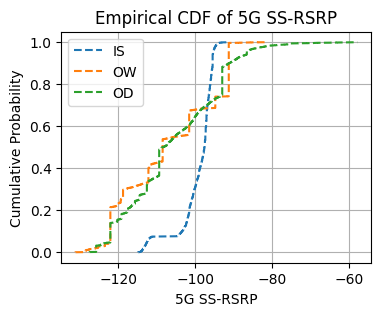

In [83]:
# Plot the ECDF
plt.figure(figsize=(4, 3))

Mobility_Scenario = ['IS', 'OW', 'OD']
for Mobility in Mobility_Scenario:
    filtered_data = active_throughput[
        (active_throughput['Scenario'] == Mobility) &
        (active_throughput['UE Mode'] == '5G-enabled') &
        (active_throughput['Operator'] == 'Op2')
    ]['SS-RSRP']
    
    # Replace '?' with NaN
    filtered_data.replace('?', np.nan, inplace=True)

    # Forward and backward fill NaN values
    filtered_data.ffill(inplace=True)
    filtered_data.bfill(inplace=True)
    
    # Convert the filtered data to numeric values (if not already)
    filtered_data = pd.to_numeric(filtered_data, errors='coerce').dropna()

    # Calculate the ECDF
    ecdf = ECDF(filtered_data)
    plt.plot(ecdf.x, ecdf.y, label=Mobility, marker='', linestyle='--')

plt.xlabel('5G SS-RSRP')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of 5G SS-RSRP')
plt.legend()
plt.grid(True)
plt.show()

Handover occurance and RSRP for one campaign.

C:\Users\Asus irG\AppData\Local\Temp\ipykernel_11436\217358747.py:13: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  active_throughput = pd.read_csv(r'C:\Users\Asus irG\Desktop\Mess\Giuseppe\Assignment\dataset\Throughput Tests - Speedtest - Active Measurements.csv')
C:\Users\Asus irG\AppData\Local\Temp\ipykernel_11436\217358747.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = df['Time'].apply(time_to_seconds)
C:\Users\Asus irG\AppData\Local\Temp\ipykernel_11436\217358747.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

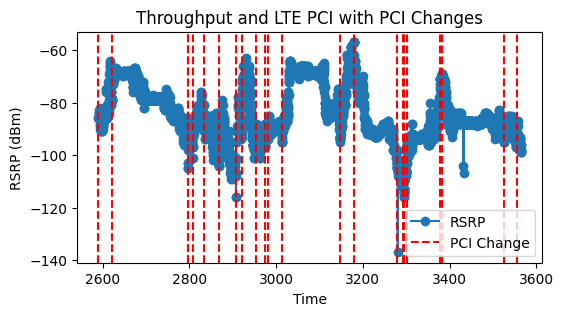

In [3]:
# Convert 'Time' to seconds for plotting
def time_to_seconds(time_str):
    parts = time_str.split(':')
    if len(parts) == 3:  # HH:MM:SS.s
        hours, minutes, seconds = parts
        total_seconds = int(hours) * 3600 + int(minutes) * 60 + float(seconds)
    elif len(parts) == 2:  # MM:SS.s
        minutes, seconds = parts
        total_seconds = int(minutes) * 60 + float(seconds)
    return total_seconds


active_throughput = pd.read_csv(r'Throughput Tests - Speedtest - Active Measurements.csv')



mobility_scenario = 'OD'
selected_campaign_throuhput = active_throughput[(active_throughput['Scenario'] == mobility_scenario) & 
                (active_throughput['UE Mode'] ==  '5G-enabled') & 
                    (active_throughput['Campaign'] == 'Speedtest_Campaign_2') &
                  # (active_throughput['LTE PCI'] == '391') &
                   # (active_throughput['LTE PCI'] != '?') &
                (active_throughput['Operator'] == 'Op2')& 
              (active_throughput['RSRP'] != '?')]
df = selected_campaign_throuhput


df['Time'] = df['Time'].apply(time_to_seconds)

# Detect changes in 'LTE PCI'
df['PCI Change'] = df['LTE PCI'].ne(df['LTE PCI'].shift())

# Plotting the Throughput
plt.figure(figsize=(6, 3))
plt.plot(df['Time'], df['RSRP'].astype(int), label='RSRP', marker='o')

# Marking the PCI changes on the plot
for idx, change in df[df['PCI Change']].iterrows():
    plt.axvline(x=change['Time'], color='r', linestyle='--', label='PCI Change' if idx == df[df['PCI Change']].index[0] else "")

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Time')
plt.ylabel('RSRP (dBm)')

plt.title('Throughput and LTE PCI with PCI Changes')
plt.show()


ML-based throughput prediction based on radio signal quality features.

In [ ]:
import numpy as np

filtered_data = active_throughput[active_throughput['UE Mode'] == '5G-enabled'][[
                '5G PCI', 'SS-RSRP','SS-RSRQ', 'SS-SINR',
                # '5G  PDSCH QPSK Rate', '5G  PDSCH 16QAM Rate',
                # '5G  PDSCH 64QAM Rate', '5G  PDSCH 256QAM Rate',
                 '5G PDSCH Throughput'
                ]]

# Replace '?' with NaN
filtered_data.replace(['?', '0'], np.nan, inplace=True)

# Forward and backward fill NaN values
filtered_data['5G PCI'].ffill( inplace=True)
filtered_data['5G PDSCH Throughput'].ffill( inplace=True)

# Remove NaNs
filtered_data = filtered_data.dropna(subset=['5G PCI'], how='all')
filtered_data = filtered_data.dropna(subset=['SS-RSRP'], how='all')
filtered_data = filtered_data.dropna(subset=['5G PDSCH Throughput'], how='all')


Step 1: Prepare the dataset for trainig the model.

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split

selected_features = [
                '5G PCI', 'SS-RSRP','SS-RSRQ', 'SS-SINR',
                 '5G PDSCH Throughput'
                    ]
# Create the dataset based on the selected features
dataset = active_throughput[active_throughput['UE Mode'] == '5G-enabled'][selected_features]


# Replace '?' with NaN
dataset.replace(['?', '0'], np.nan, inplace=True)

# Forward and backward fill NaN values
dataset['5G PCI'].ffill( inplace=True)
dataset['5G PDSCH Throughput'].ffill( inplace=True)

# Remove NaNs
dataset = dataset.dropna(subset=['5G PCI'], how='all')
dataset = dataset.dropna(subset=['SS-RSRP'], how='all')
dataset = dataset.dropna(subset=['5G PDSCH Throughput'], how='all')



# Drop rows with any missing values
dataset = dataset.dropna()

# Define the target variable for prediction
target = '5G PDSCH Throughput'

# Create features (X) and target (y) datasets
X = dataset[['5G PCI', 'SS-RSRP','SS-RSRQ', 'SS-SINR']].astype(float)
y = 1e-3 * dataset[target].astype(float)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

# Optionally, save the datasets to CSV files for further use
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


Training set shape: (11188, 4)
Test set shape: (2798, 4)


C:\Users\Asus irG\AppData\Local\Temp\ipykernel_22780\3849567745.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['5G PCI'].ffill( inplace=True)
C:\Users\Asus irG\AppData\Local\Temp\ipykernel_22780\3849567745.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Step 2:Train the models using PyTorch. We use Liear regression and a deep neural network with ReLu activation.

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return self.linear(x)

# Define the Deep Neural Network model
class DNNModel(nn.Module):
    def __init__(self, input_dim, hidden_layers, nodes_per_layer):
        super(DNNModel, self).__init__()
        layers = []
        for i in range(hidden_layers):
            if i == 0:
                layers.append(nn.Linear(input_dim, nodes_per_layer))
            else:
                layers.append(nn.Linear(nodes_per_layer, nodes_per_layer))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(nodes_per_layer, 1))
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Training settings
input_dim = X_train.shape[1]
hidden_layers = 3
nodes_per_layer = 64
learning_rate = 0.001
num_epochs = 100

# Initialize models, loss function, and optimizers
lr_model = LinearRegressionModel(input_dim)
dnn_model = DNNModel(input_dim, hidden_layers, nodes_per_layer)
criterion = nn.MSELoss()
lr_optimizer = optim.Adam(lr_model.parameters(), lr=learning_rate)
dnn_optimizer = optim.Adam(dnn_model.parameters(), lr=learning_rate)

# Train the Linear Regression model
lr_train_losses, lr_test_losses = [], []
for epoch in range(num_epochs):
    lr_model.train()
    lr_optimizer.zero_grad()
    lr_outputs = lr_model(X_train_tensor)
    lr_loss = criterion(lr_outputs, y_train_tensor)
    lr_loss.backward()
    lr_optimizer.step()
    
    lr_model.eval()
    with torch.no_grad():
        lr_test_outputs = lr_model(X_test_tensor)
        lr_test_loss = criterion(lr_test_outputs, y_test_tensor)
    
    lr_train_losses.append(lr_loss.item())
    lr_test_losses.append(lr_test_loss.item())
    if epoch % 10 == 0:
        print(f'LR Epoch [{epoch+1}/{num_epochs}], Train Loss: {lr_loss.item():.4f}, Test Loss: {lr_test_loss.item():.4f}')

# Train the DNN model
dnn_train_losses, dnn_test_losses = [], []
for epoch in range(num_epochs):
    dnn_model.train()
    dnn_optimizer.zero_grad()
    dnn_outputs = dnn_model(X_train_tensor)
    dnn_loss = criterion(dnn_outputs, y_train_tensor)
    dnn_loss.backward()
    dnn_optimizer.step()
    
    dnn_model.eval()
    with torch.no_grad():
        dnn_test_outputs = dnn_model(X_test_tensor)
        dnn_test_loss = criterion(dnn_test_outputs, y_test_tensor)
    
    dnn_train_losses.append(dnn_loss.item())
    dnn_test_losses.append(dnn_test_loss.item())
    if epoch % 10 == 0:
        print(f'DNN Epoch [{epoch+1}/{num_epochs}], Train Loss: {dnn_loss.item():.4f}, Test Loss: {dnn_test_loss.item():.4f}')


LR Epoch [1/100], Train Loss: 36637.8281, Test Loss: 37144.6484
LR Epoch [11/100], Train Loss: 36401.7578, Test Loss: 36878.9297
LR Epoch [21/100], Train Loss: 36193.8867, Test Loss: 36642.2578
LR Epoch [31/100], Train Loss: 36015.6914, Test Loss: 36436.5625
LR Epoch [41/100], Train Loss: 35866.5078, Test Loss: 36261.5078
LR Epoch [51/100], Train Loss: 35743.9961, Test Loss: 36115.0352
LR Epoch [61/100], Train Loss: 35644.8594, Test Loss: 35994.0430
LR Epoch [71/100], Train Loss: 35565.4023, Test Loss: 35895.0078
LR Epoch [81/100], Train Loss: 35501.9141, Test Loss: 35814.3086
LR Epoch [91/100], Train Loss: 35450.9375, Test Loss: 35748.5273
DNN Epoch [1/100], Train Loss: 42095.7773, Test Loss: 42766.9648
DNN Epoch [11/100], Train Loss: 37106.0195, Test Loss: 37480.9336
DNN Epoch [21/100], Train Loss: 34127.5430, Test Loss: 34556.2852
DNN Epoch [31/100], Train Loss: 34168.1562, Test Loss: 34464.4805
DNN Epoch [41/100], Train Loss: 33922.1914, Test Loss: 34504.5391
DNN Epoch [51/100], Tr

Step 3: Plot the training and test loss for each model

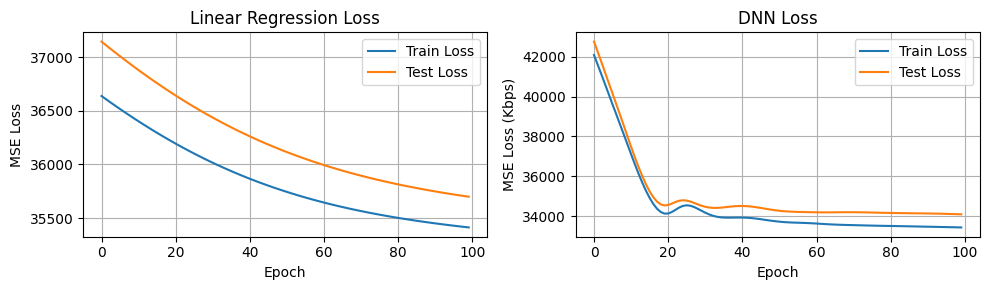

In [34]:
# Plot the training and test loss for each model
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Plot for Linear Regression model
axs[0].plot(lr_train_losses, label='Train Loss')
axs[0].plot(lr_test_losses, label='Test Loss')
axs[0].set_title('Linear Regression Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('MSE Loss')
axs[0].legend()
axs[0].grid(True)

# Plot for DNN model
axs[1].plot(dnn_train_losses, label='Train Loss')
axs[1].plot(dnn_test_losses, label='Test Loss')
axs[1].set_title('DNN Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MSE Loss (Kbps)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
